In [1]:
# import dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Read wellness data and print the first five rows
wellness_data_to_load = Path("resources/wellness_and_lifestyle.csv")
wellness_data_df = pd.read_csv(wellness_data_to_load)

In [34]:
# Build DataFrame with values related to social networking
stress = wellness_data_df["DAILY_STRESS"]
core_friends = wellness_data_df["CORE_CIRCLE"]
interactions = wellness_data_df["SOCIAL_NETWORK"]
places = wellness_data_df["PLACES_VISITED"]
work_life_score = wellness_data_df["WORK_LIFE_BALANCE_SCORE"]
age_range = wellness_data_df["AGE"]
gender = wellness_data_df["GENDER"]

networking_df = pd.DataFrame({"Age": age_range,
                              "Gender": gender,
                              "Core Circle": core_friends,
                              "Network": interactions,
                              "Places Visited": places,
                              "Stress": stress,
                              "Work Life Score": work_life_score})

# Convert Stress column to integer after dropping the error value
networking_df = networking_df.loc[(networking_df["Stress"] == "0") |
                                  (networking_df["Stress"] == "1") |
                                  (networking_df["Stress"] == "2") |
                                  (networking_df["Stress"] == "3") |
                                  (networking_df["Stress"] == "4") |
                                  (networking_df["Stress"] == "5")]

networking_df["Stress"] = networking_df["Stress"].astype(int)

# Rename age values for plotting purposes
networking_df = networking_df.replace("Less than 20", "20 or Younger")
networking_df = networking_df.replace("51 or more", "51 or Older")

# Create bins for Work Life Balance Scores
bins = [0, 550, 680, 900]
group_names = ["Poor", "Good", "Excellent"]
networking_df["Work Life Summary"] = pd.cut(networking_df["Work Life Score"], bins, labels=group_names, include_lowest=True)

# Create separate dataframes for male and female respondents
networking_male_df = networking_df.loc[networking_df["Gender"] == "Male"]
networking_female_df = networking_df.loc[networking_df["Gender"] == "Female"]
networking_df.head()

,Age,Gender,Core Circle,Network,Places Visited,Stress,Work Life Score,Work Life Summary
0,36 to 50,Female,5,5,2,2,609.5,Good
1,36 to 50,Female,3,10,4,3,655.6,Good
2,36 to 50,Female,4,10,3,3,631.6,Good
3,51 or Older,Female,3,7,10,3,622.7,Good
4,51 or Older,Female,3,4,3,1,663.9,Good


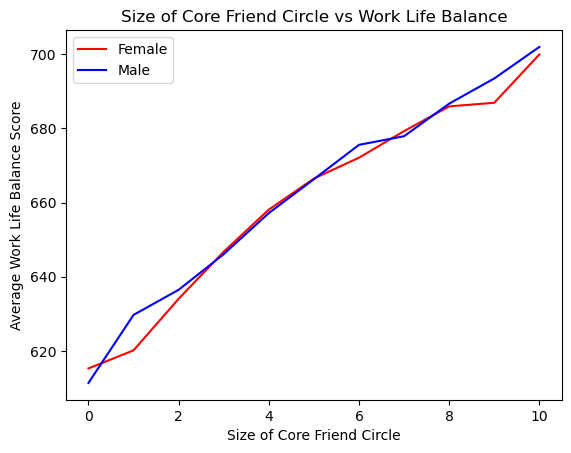

In [3]:
# Plot Core Friends vs Work Life Score
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Core Circle")["Work Life Score"].mean()
y_male = networking_male_df.groupby("Core Circle")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Size of Core Friend Circle vs Work Life Balance")
plt.xlabel("Size of Core Friend Circle")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

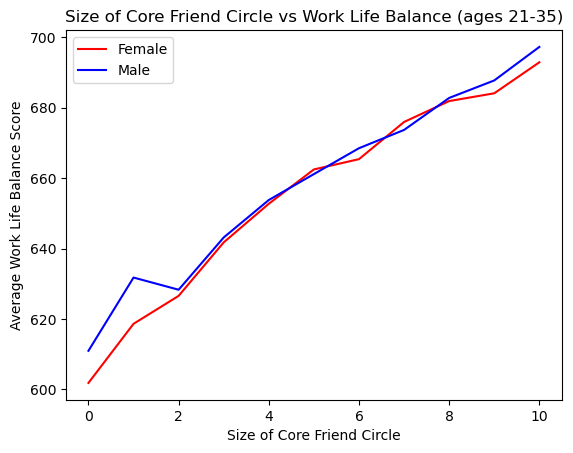

In [4]:
# Isolate male and female respondents in the 21-35 range
male_age2135_df = networking_male_df.loc[networking_male_df["Age"] == "21 to 35"]
female_age2135_df = networking_female_df.loc[networking_female_df["Age"] == "21 to 35"]

# Plot Core Friends vs Work Life Score for ages 21-35
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = female_age2135_df.groupby("Core Circle")["Work Life Score"].mean()
y_male = male_age2135_df.groupby("Core Circle")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Size of Core Friend Circle vs Work Life Balance (ages 21-35)")
plt.xlabel("Size of Core Friend Circle")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

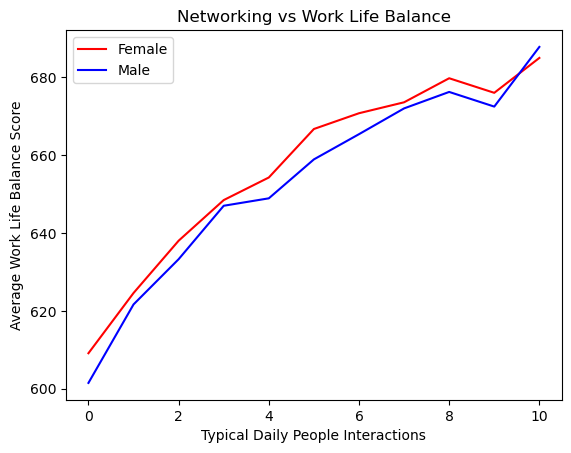

In [5]:
# Plot Networking vs Work Life Score
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Network")["Work Life Score"].mean()
y_male = networking_male_df.groupby("Network")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male") 

# Add title and labels
plt.title("Networking vs Work Life Balance")
plt.xlabel("Typical Daily People Interactions")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

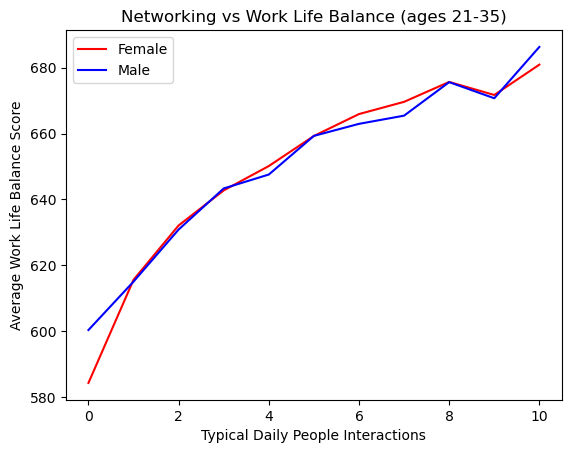

In [6]:
# Plot Networking vs Work Life Score for ages 21-35
y_female = female_age2135_df.groupby("Network")["Work Life Score"].mean()
y_male = male_age2135_df.groupby("Network")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male") 

# Add title and labels
plt.title("Networking vs Work Life Balance (ages 21-35)")
plt.xlabel("Typical Daily People Interactions")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

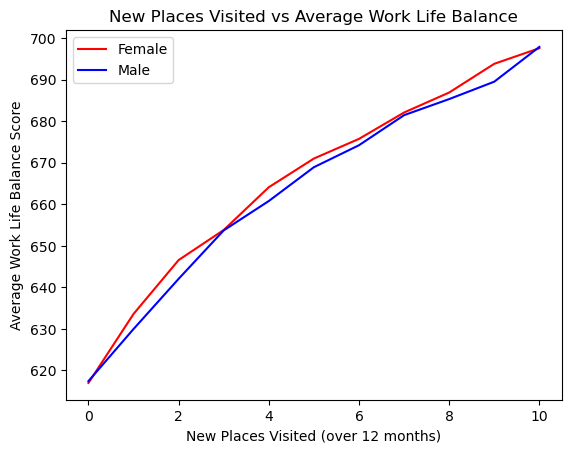

In [7]:
# Plot Places Visited vs Work Life Balance
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Places Visited")["Work Life Score"].mean()
y_male = networking_male_df.groupby("Places Visited")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male") 

# Add title and labels
plt.title("New Places Visited vs Average Work Life Balance")
plt.xlabel("New Places Visited (over 12 months)")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

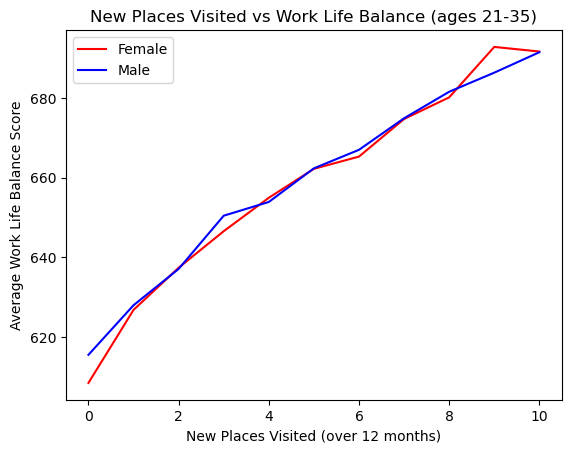

In [8]:
# Plot Places Visited vs Work Life Score for ages 21-35
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = female_age2135_df.groupby("Places Visited")["Work Life Score"].mean()
y_male = male_age2135_df.groupby("Places Visited")["Work Life Score"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male") 

# Add title and labels
plt.title("New Places Visited vs Work Life Balance (ages 21-35)")
plt.xlabel("New Places Visited (over 12 months)")
plt.ylabel("Average Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

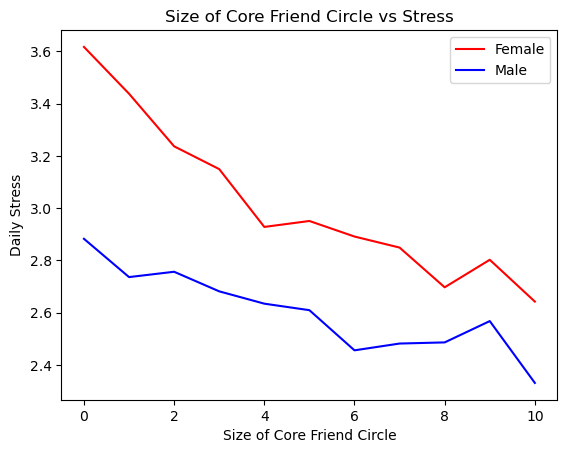

In [9]:
# Plot Core Friends vs Daily Stress
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Core Circle")["Stress"].mean()
y_male = networking_male_df.groupby("Core Circle")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Size of Core Friend Circle vs Stress")
plt.xlabel("Size of Core Friend Circle")
plt.ylabel("Daily Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

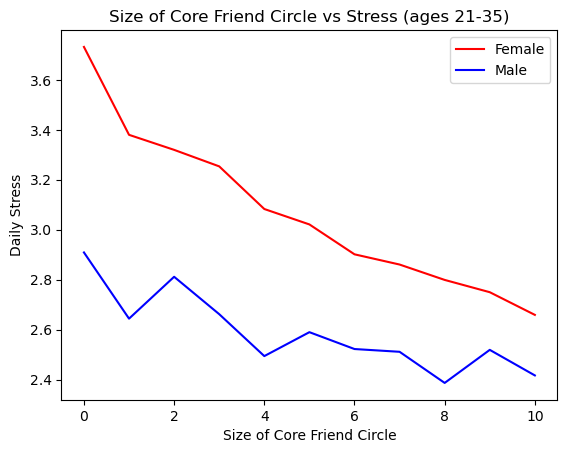

In [10]:
# Plot Core Friends vs Daily Stress for ages 21-35
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = female_age2135_df.groupby("Core Circle")["Stress"].mean()
y_male = male_age2135_df.groupby("Core Circle")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Size of Core Friend Circle vs Stress (ages 21-35)")
plt.xlabel("Size of Core Friend Circle")
plt.ylabel("Daily Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

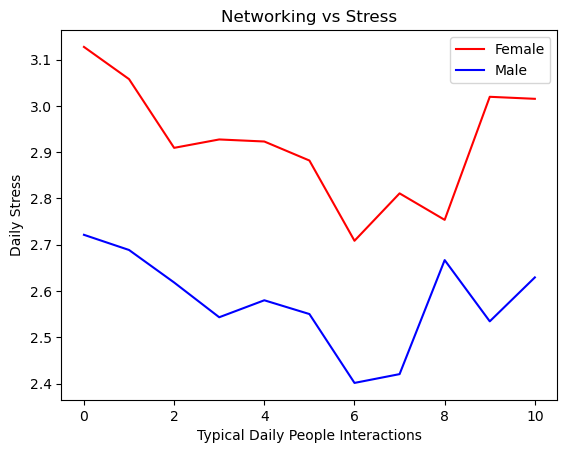

In [11]:
# Plot Networking vs Daily Stress
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Network")["Stress"].mean()
y_male = networking_male_df.groupby("Network")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Networking vs Stress")
plt.xlabel("Typical Daily People Interactions")
plt.ylabel("Daily Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

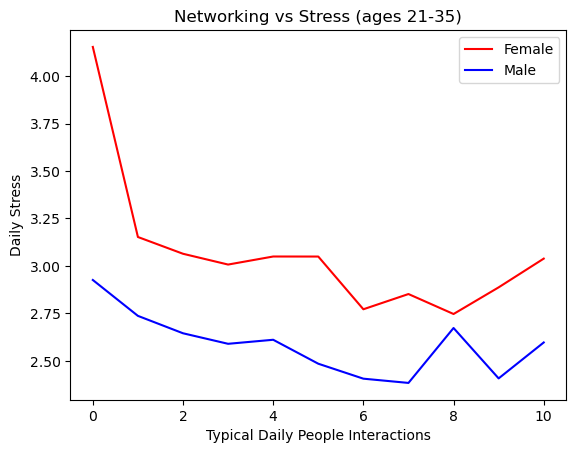

In [12]:
# Plot Networking vs Daily Stress for ages 21-35
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = female_age2135_df.groupby("Network")["Stress"].mean()
y_male = male_age2135_df.groupby("Network")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Networking vs Stress (ages 21-35)")
plt.xlabel("Typical Daily People Interactions")
plt.ylabel("Daily Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

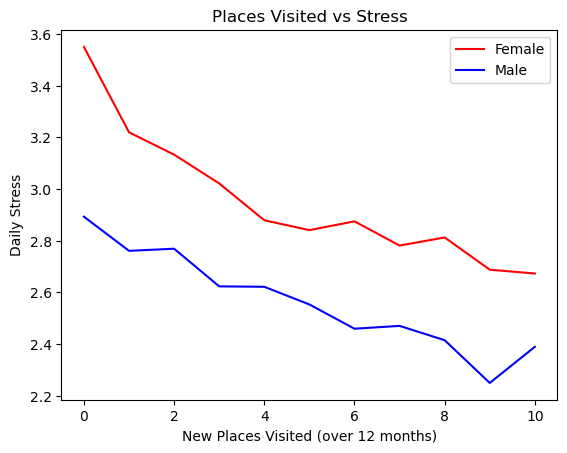

In [13]:
# Plot Places Visited vs Daily Stress
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = networking_female_df.groupby("Places Visited")["Stress"].mean()
y_male = networking_male_df.groupby("Places Visited")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add title and labels
plt.title("Places Visited vs Stress")
plt.xlabel("New Places Visited (over 12 months)")
plt.ylabel("Daily Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

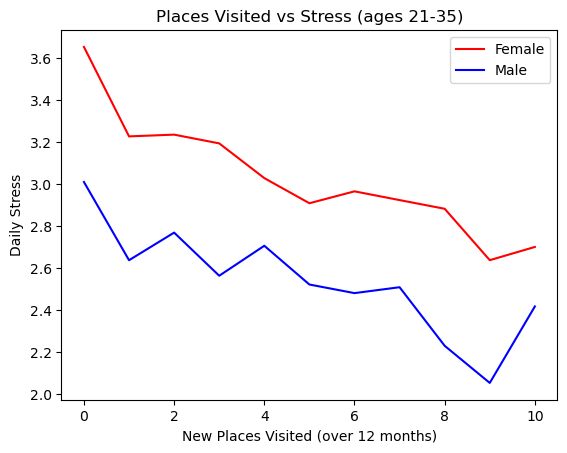

In [14]:
# Plot Places Visited vs Daily Stress for ages 21-35
x_axis = [0,1,2,3,4,5,6,7,8,9,10]
y_female = female_age2135_df.groupby("Places Visited")["Stress"].mean()
y_male = male_age2135_df.groupby("Places Visited")["Stress"].mean()
female, = plt.plot(x_axis, y_female, color="red", label="Female")
male, = plt.plot(x_axis, y_male, color="blue", label="Male")

# Add titel and labels
plt.title("Places Visited vs Stress (ages 21-35)")
plt.xlabel("New Places Visited (over 12 months)")
plt.ylabel("Daily Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

In [15]:
# Print out the number of respondents by age, gender
male_age_count = networking_male_df["Age"].value_counts()
print(f"Male respondents by age: {male_age_count}")
female_age_count = networking_female_df["Age"].value_counts()
print(f"Female respondents by age: {female_age_count}")

Male respondents by age: Age
21 to 35         2566
36 to 50         1694
51 or Older      1099
20 or Younger     754
Name: count, dtype: int64
Female respondents by age: Age
21 to 35         3541
36 to 50         2961
51 or Older      2291
20 or Younger    1065
Name: count, dtype: int64


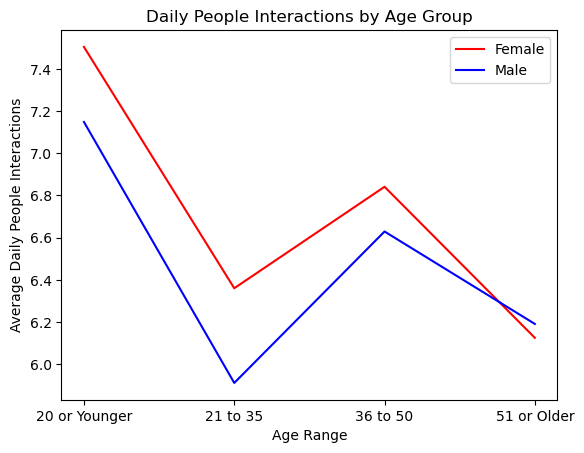

In [16]:
# Plot Networking by Age Range
male_network_age = networking_male_df.groupby("Age")["Network"].mean()
female_network_age = networking_female_df.groupby("Age")["Network"].mean()
x_axis = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]
female, = plt.plot(x_axis, female_network_age, color="red", label="Female")
male, = plt.plot(x_axis, male_network_age, color="blue", label="Male")

# Add title and labels
plt.title("Daily People Interactions by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Average Daily People Interactions")
plt.legend(handles=[female, male], loc="best")

plt.show()

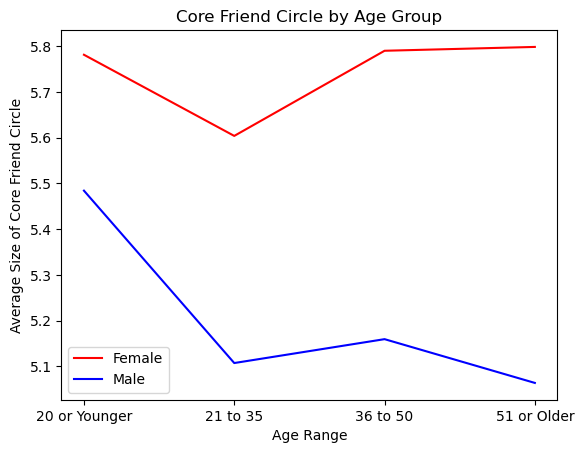

In [17]:
# Plot Core Friend Circle by age group
male_core_age = networking_male_df.groupby("Age")["Core Circle"].mean()
female_core_age = networking_female_df.groupby("Age")["Core Circle"].mean()
x_axis = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]
female, = plt.plot(x_axis, female_core_age, color="red", label="Female")
male, = plt.plot(x_axis, male_core_age, color="blue", label="Male")

# Add title and labels
plt.title("Core Friend Circle by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Average Size of Core Friend Circle")
plt.legend(handles=[female, male], loc="best")

plt.show()

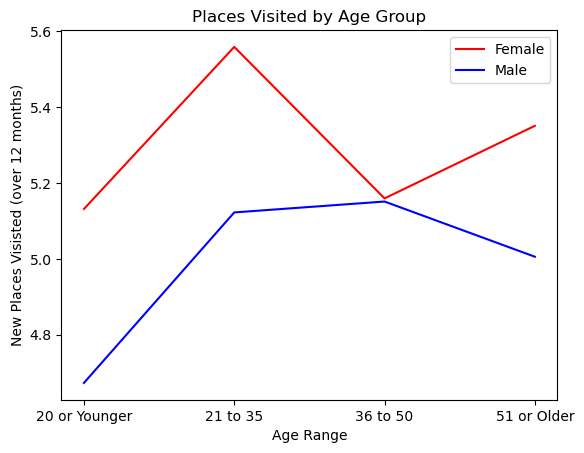

In [18]:
# Plot New Places Visited by age group
male_places_age = networking_male_df.groupby("Age")["Places Visited"].mean()
female_places_age = networking_female_df.groupby("Age")["Places Visited"].mean()
x_axis = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]
female, = plt.plot(x_axis, female_places_age, color="red", label="Female")
male, = plt.plot(x_axis, male_places_age, color="blue", label="Male")

# Add title and labels
plt.title("Places Visited by Age Group")
plt.xlabel("Age Range")
plt.ylabel("New Places Visisted (over 12 months)")
plt.legend(handles=[female, male], loc="best")

plt.show()

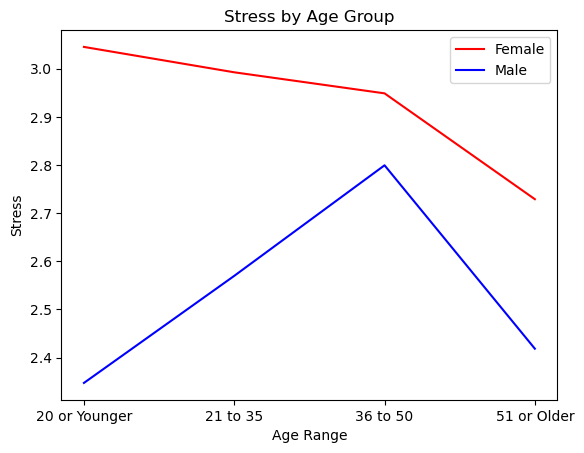

In [19]:
# Plot Stress by age group
male_stress_age = networking_male_df.groupby("Age")["Stress"].mean()
female_stress_age = networking_female_df.groupby("Age")["Stress"].mean()
x_axis = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]
female, = plt.plot(x_axis, female_stress_age, color="red", label="Female")
male, = plt.plot(x_axis, male_stress_age, color="blue", label="Male")

# Add title and labels
plt.title("Stress by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Stress")
plt.legend(handles=[female, male], loc="best")

plt.show()

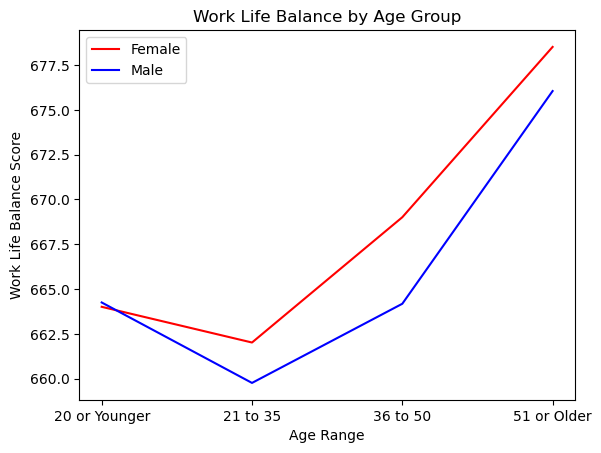

In [20]:
# Plot Work Life Balance Score by age group
male_worklife_age = networking_male_df.groupby("Age")["Work Life Score"].mean()
female_worklife_age = networking_female_df.groupby("Age")["Work Life Score"].mean()
x_axis = ["20 or Younger", "21 to 35", "36 to 50", "51 or Older"]
female, = plt.plot(x_axis, female_worklife_age, color="red", label="Female")
male, = plt.plot(x_axis, male_worklife_age, color="blue", label="Male")

# Add title and labels
plt.title("Work Life Balance by Age Group")
plt.xlabel("Age Range")
plt.ylabel("Work Life Balance Score")
plt.legend(handles=[female, male], loc="best")

plt.show()

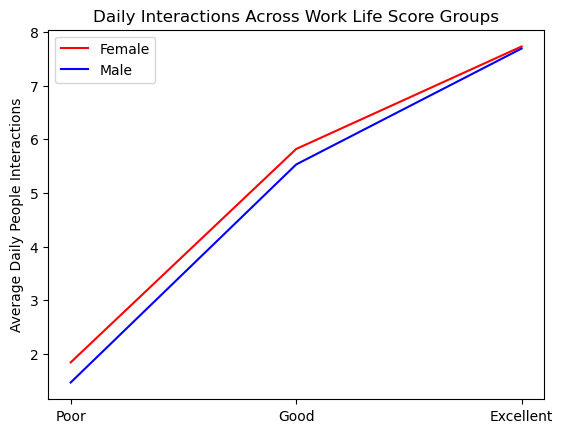

In [35]:
# Plot Networking across the different Work Life Score bins
male_summary_networking = networking_male_df.groupby("Work Life Summary")["Network"].mean()
female_summary_networking = networking_female_df.groupby("Work Life Summary")["Network"].mean()
x_axis_summary = ["Poor", "Good", "Excellent"]
female, = plt.plot(x_axis_summary, female_summary_networking, color="red", label="Female")
male, = plt.plot(x_axis_summary, male_summary_networking, color="blue", label="Male")

# Add title and labels
plt.title("Daily Interactions Across Work Life Score Groups")
plt.ylabel("Average Daily People Interactions")
plt.legend(handles=[female, male], loc="best")

plt.show()

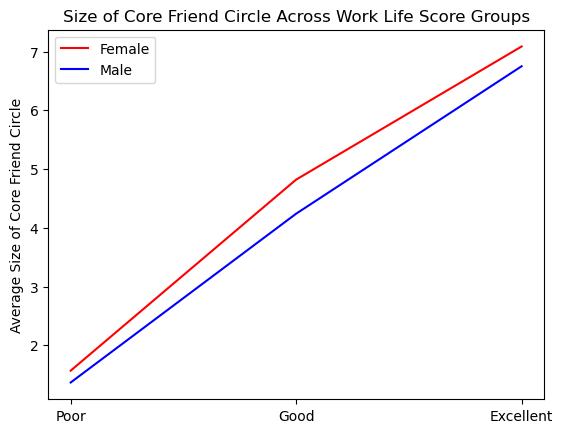

In [36]:
# Plot Core Circle across the different Work Life Score bins
male_summary_circle = networking_male_df.groupby("Work Life Summary")["Core Circle"].mean()
female_summary_circle = networking_female_df.groupby("Work Life Summary")["Core Circle"].mean()
x_axis_summary = ["Poor", "Good", "Excellent"]
female, = plt.plot(x_axis_summary, female_summary_circle, color="red", label="Female")
male, = plt.plot(x_axis_summary, male_summary_circle, color="blue", label="Male")

# Add title and labels
plt.title("Size of Core Friend Circle Across Work Life Score Groups")
plt.ylabel("Average Size of Core Friend Circle")
plt.legend(handles=[female, male], loc="best")

plt.show()

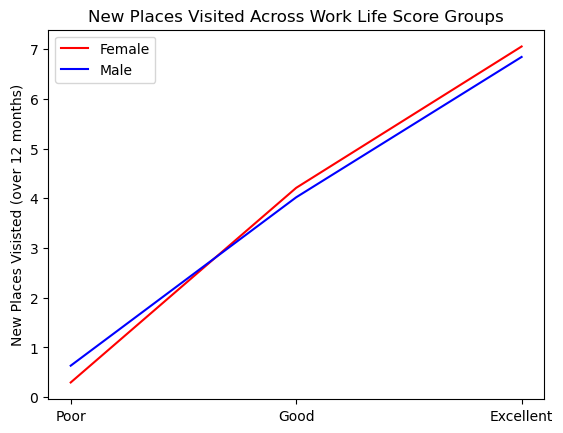

In [37]:
# Plot Places Visited across the different Work Life Score bins
male_summary_places = networking_male_df.groupby("Work Life Summary")["Places Visited"].mean()
female_summary_places = networking_female_df.groupby("Work Life Summary")["Places Visited"].mean()
x_axis_summary = ["Poor", "Good", "Excellent"]
female, = plt.plot(x_axis_summary, female_summary_places, color="red", label="Female")
male, = plt.plot(x_axis_summary, male_summary_places, color="blue", label="Male")

# Add title and labels
plt.title("New Places Visited Across Work Life Score Groups")
plt.ylabel("New Places Visisted (over 12 months)")
plt.legend(handles=[female, male], loc="best")

plt.show()